In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

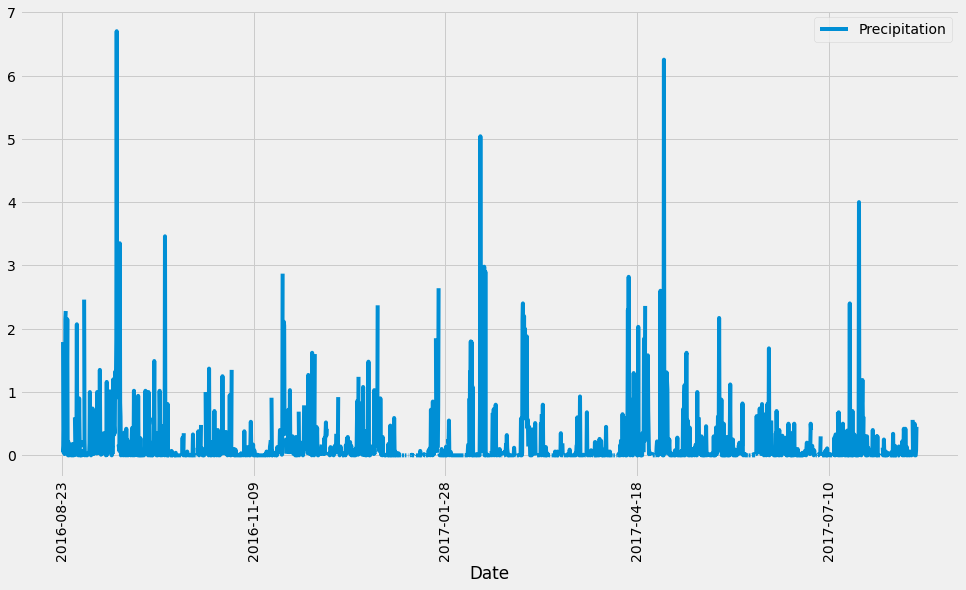

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Latest_date = session.query(func.max(Measurement.date)).first()

# Calculate the date 1 year ago from the last data point in the database
previousyr_date = dt.date(2017,8,23)-dt.timedelta(days=365)
previousyr_date
# Perform a query to retrieve the data and precipitation scores
yr_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=previousyr_date).all()
yr_data

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(yr_data, columns=['Date', 'Precipitation'])
df
# Sort the dataframe by date
sorted_df = df.sort_values(['Date'], ascending=True)
sorted_df.reset_index(drop=True, inplace=True)
sorted_df
# Use Pandas Plotting with Matplotlib to plot the data
# plt.subplots()
sorted_df.plot(x='Date', y='Precipitation', figsize=(15,8))
plt.tick_params(which='both', axis='x', rotation=90)
# plt.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)
# plt.grid(which='both')

In [11]:
# year = Latest_date.strftime("%Y")
# month = Latest_date.strftime("%-m")
# day = Latest_date.strftime("%d")
# type(str(Latest_date))
dt.datetime.strptime(Latest_date[0], "%Y-%m-%d")
# strptime('2017-9-10')
# type(Latest_date[0])
# dt.date.strptime(Latest_date[0])

datetime.datetime(2017, 8, 23, 0, 0)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

sorted_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [13]:
inspector = inspect(engine)

In [14]:
# Design a query to show how many stations are available in this dataset?
# columns = inspector.get_columns('Station')
# for c in columns:
#     print(c['name'], c['type'])
    
stations = session.query(func.count(Station.id)).all()
stations

[(9)]

In [15]:
# columns = inspector.get_columns('Measurement')
# for c in columns:
#     print(c['name'], c['type'])
measurement_stations = session.query(func.count(Measurement.id)).all()
measurement_stations

[(19550)]

In [16]:
engine.execute('select * from Measurement limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [17]:
engine.execute('select * from Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).first()
active_station


('USC00519281')

In [19]:
active_station_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station==active_station[0]).all()
active_station_data

[('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 76.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 70.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 68.0),
 ('USC00519281', 64.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 70.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 69.0),
 ('USC00519281', 60.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 65.0),
 ('USC00519281', 75.0),
 ('USC00519281', 69.0),
 ('USC00519281', 67.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 67.0),
 ('USC00519281', 65.0),
 ('USC00519281', 64.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 68.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 61.0),
 ('USC00519281',

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").group_by(Measurement.station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
highest_tobs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
last_temp_date = session.query(func.max(Measurement.date)).filter(Measurement.station=='USC00519281').all()

last_temp_date
prev_yr_temp_date = dt.date(2017,8,18)-dt.timedelta(days=365)
prev_yr_temp_date

datetime.date(2016, 8, 18)

In [23]:
temp_yr_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date>=prev_yr_temp_date).all()
temp_yr_data
temp_yr_df = pd.DataFrame(temp_yr_data, columns={'Date', 'Temperature'})
sorted_temp_df = temp_yr_df.sort_values(['Date'], ascending=True)
sorted_temp_df.reset_index(drop=True, inplace=True)
sorted_temp_df

,Temperature,Date
0,2017-02-08,59.0
1,2017-02-09,59.0
2,2017-02-02,59.0
3,2017-02-03,60.0
4,2017-04-30,60.0
...,...,...
352,2017-07-02,81.0
353,2017-07-23,82.0
354,2017-07-29,82.0
355,2017-08-05,82.0


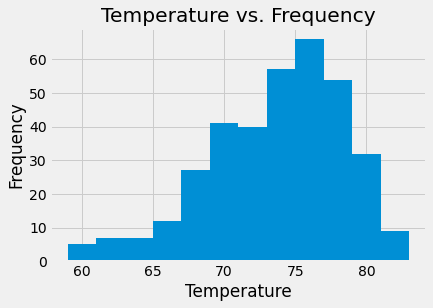

In [24]:
sorted_temp_df.plot.hist(bins=12, title="Temperature vs. Frequency", legend=None)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


## Bonus Challenge Assignment

In [25]:
conn = engine.connect()
hawaii_df = pd.read_sql("SELECT * FROM Measurement", conn)
hawaii_df.head() 

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-01-01', '2017-03-30'))

[(59.0, 70.60545454545455, 82.0)]


In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
results = calc_temps('2016-01-01', '2017-01-01')
results_df = pd.DataFrame(results, columns = {"min_temp", "avg_temp", "max_temp"})
results_df

,avg_temp,min_temp,max_temp
0,56.0,74.131749,84.0


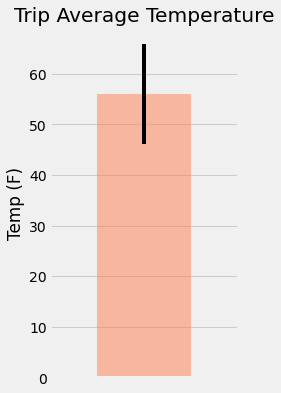

In [29]:
results_df.plot.bar(y="avg_temp", yerr=(results_df["max_temp"] - results_df["min_temp"]), title="Trip Average Temperature", color="coral", 
                    alpha=0.5, figsize=(3,6), legend=None)
plt.xticks([])
plt.ylabel("Temp (F)")
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
mytrip_start = 2017-1-1
mytrip_end = 2016-1-1
# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [34]:
# Plot the daily normals as an area plot with `stacked=False`
